# **Transformações Geométricas**

## Funções

In [26]:
def translate_image(image, translation):
    new_image = np.zeros(image.shape, dtype='uint8')
    t_x = translation[0]
    t_y = translation[1]
    matrix = np.array([
        [1, 0, t_x],
        [0, 1, t_y],
        [0, 0, 1]
    ])
    
    for i in range(0, image.shape[1]): #W
        for j in range(0, image.shape[0]): #H
            
            new_i, new_j, _ = np.matmul(matrix, [[i],[j],[1]]).astype(int)
            
            if new_i >= image.shape[1] or new_i < 0:
                continue
            if new_j >= image.shape[0] or new_j < 0:
                continue
                
            new_image[new_j[0]][new_i[0]] = image[j][i]

    return new_image


def scale_image(image, scale):
    new_image = np.zeros(image.shape, dtype='uint8')
    s_x = scale[0]
    s_y = scale[1]
    matrix = np.array([
        [s_x, 0, 0],
        [0, s_y, 0],
        [0, 0, 1]
    ])
    
    for i in range(0, image.shape[1]): #W
        for j in range(0, image.shape[0]): #H
            
            new_i, new_j, _ = np.matmul(matrix, [[i],[j],[1]]).astype(int)
            
            if new_i >= image.shape[1] or new_i < 0:
                continue
            if new_j >= image.shape[0] or new_j < 0:
                continue
                
            new_image[new_j[0]][new_i[0]] = image[j][i] 

    return new_image


def rotate_image(image, angle):
    new_image = np.zeros(image.shape, dtype='uint8')
    
    matrix = np.array([
        [math.cos(angle), -math.sin(angle), 0],
        [math.sin(angle), math.cos(angle), 0],
        [0, 0, 1]
    ])

    for i in range(0, image.shape[1]): #W
        for j in range(0, image.shape[0]): #H
            
            new_i, new_j, _ = np.matmul(matrix, [[i],[j],[1]]).astype(int)
            
            if new_i >= image.shape[1] or new_i < 0:
                continue
            if new_j >= image.shape[0] or new_j < 0:
                continue
            
            new_image[new_j[0]][new_i[0]] = image[j][i]        

    return new_image


def rotate_image_from_center(image, angle):
    new_image = np.zeros(image.shape, dtype='uint8')
    center_x = img.shape[1]/2
    center_y = img.shape[0]/2
    matrix = np.array([
        [math.cos(angle), -math.sin(angle), center_x*(1-np.math.cos(angle)) + center_y*np.math.sin(angle)],
        [math.sin(angle), math.cos(angle), center_y*(1-np.math.cos(angle)) - center_x*np.math.sin(angle)],
        [0, 0, 1]
    ])

    for i in range(0, image.shape[1]): #W
        for j in range(0, image.shape[0]): #H
            
            new_i, new_j, _ = np.matmul(matrix, [[i],[j],[1]]).astype(int)
            
            if new_i >= image.shape[1] or new_i < 0:
                continue
            if new_j >= image.shape[0] or new_j < 0:
                continue
            
            new_image[new_j[0]][new_i[0]] = image[j][i]           

    return new_image



def affine_transform_image(image, matrix):
    new_image = np.zeros(image.shape, dtype='uint8')
    
    for i in range(0, image.shape[1]): #W
        for j in range(0, image.shape[0]): #H
            new_i, new_j, _ = np.matmul(matrix, [[i],[j],[1]]).astype(int)
            
            if new_i >= image.shape[1] or new_i < 0:
                continue
            if new_j >= image.shape[0] or new_j < 0:
                continue
                
            new_image[new_j[0]][new_i[0]] = image[j][i]
            
    return new_image
  

## Imports

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math

## Carregando Imagem

(512, 512, 3)


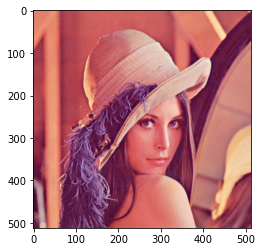

In [3]:
img = cv2.cvtColor(cv2.imread("lenna.png"), cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.show()

## Translação

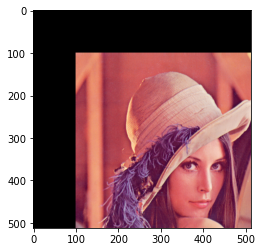

In [14]:
#slide 14

new_img = translate_image(img, (100, 100))
plt.imshow(new_img)
plt.show()

## Escala

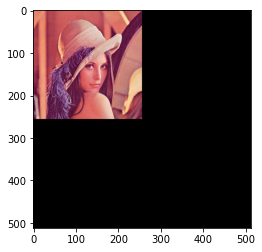

In [16]:
#slide 15

new_img = scale_image(img, (.5, .5))
plt.imshow(new_img)
plt.show()

## Rotação

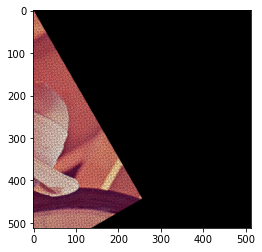

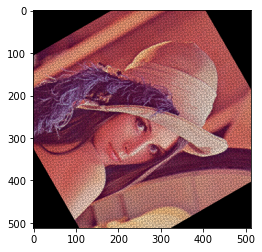

In [27]:
#slide 16
angle = 60
new_img = rotate_image(img, np.deg2rad(angle))
plt.imshow(new_img)
plt.show()


new_img = rotate_image_from_center(img, np.deg2rad(angle))
plt.imshow(new_img)
plt.show()

## Transformação Afim

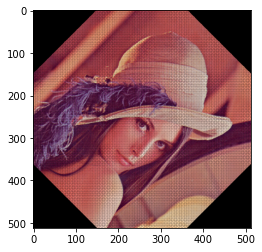

In [40]:
#slide 19
center_x = img.shape[1]/2
center_y = img.shape[0]/2
rangle = np.deg2rad(45)

M = np.float32([
                  [np.math.cos(rangle), -np.math.sin(rangle), center_x*(1-np.math.cos(rangle)) + center_y*np.math.sin(rangle)],
                  [np.math.sin(rangle), np.math.cos(rangle), center_y*(1-np.math.cos(rangle)) - center_x*np.math.sin(rangle)],
                  [0, 0, 1]
                ])
new_img = affine_transform_image(img,M)
plt.imshow(new_img)
plt.show()